<a href="https://colab.research.google.com/github/Username0515/jetbot_autopilot/blob/2020-08-10/opencv_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15298, done.
remote: Total 15298 (delta 0), reused 0 (delta 0), pack-reused 15298
Receiving objects: 100% (15298/15298), 13.68 MiB | 13.47 MiB/s, done.
Resolving deltas: 100% (10389/10389), done.


In [20]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [ ]:
!make

In [6]:
!pip install opencv-python==4.5.3.56

     |████████████████████████████████| 49.9 MB 16 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
import cv2
cv2.__version__

'4.5.3'

In [2]:
import cv2
import numpy as np
import time

In [3]:
!pwd

/content


In [74]:
# Yolo 로드



net = cv2.dnn.readNet("/content/yolov4-custom_last.weights", "/content/yolov4-custom.cfg")
classes = []
with open("/content/obj.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 1))

In [75]:
# 이미지 가져오기

img = cv2.imread("/content/xy_049_050_8ae60f6c-e5db-11eb-891f-8c554abddce7-Copy1.jpg")
img = cv2.resize(img, dsize=(416, 416), interpolation=cv2.INTER_AREA)
height, width, channels = img.shape

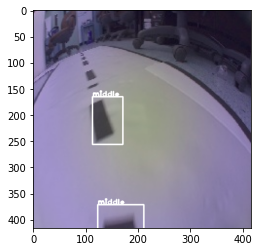

In [83]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [77]:
start = time.time()
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

print("time :", time.time() - start)

time : 1.9619061946868896


In [78]:
boxes

[[165, 142, 129, 50],
 [171, 93, 121, 146],
 [154, 120, 152, 93],
 [194, 132, 69, 81],
 [308, 188, 68, 288],
 [274, 187, 123, 292]]

In [79]:
# 정보를 화면에 표시
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # 좌표
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [80]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.2)

In [81]:
indexes

array([[0],
       [1]], dtype=int32)

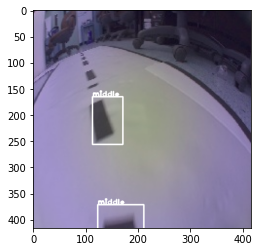

In [82]:
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = (255,255,255)
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 0), font, 1 ,color, 2)
plt.imshow(img)
plt.show()

time : 2.7893707752227783
